In [4]:
pow(2,3)

8

Net(
  (hidden): myLinear()
  (predict): myLinear()
)
######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################



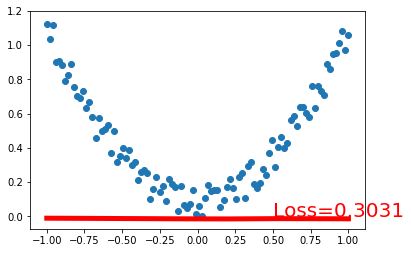

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################



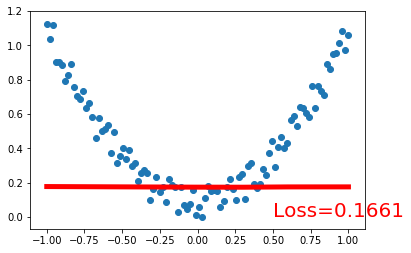

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################



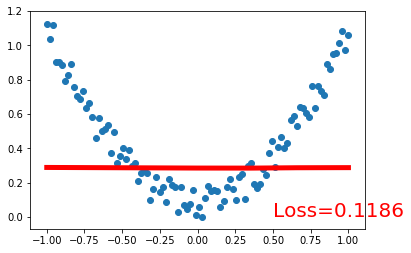

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################



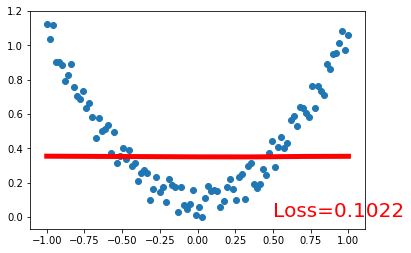

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################

######################################
Run the backward funcn
caller filename is  C:\Anaconda3\lib\site-packages\torch\autograd\function.py
caller lineno is 76
######################################



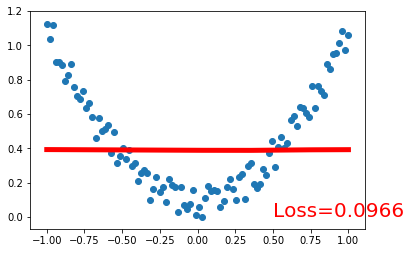

The result is below


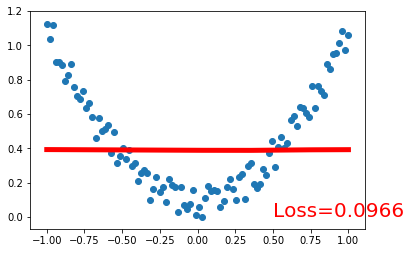

In [2]:
import torch
from torch.autograd import Variable
from torch.autograd import Function,gradcheck
from torch.nn import Module,Parameter

import matplotlib.pyplot as plt
import torch.nn.functional as F
#自定义Linear Layer

# gradcheck takes a tuple of tensors as input, check if your gradient
# evaluated with these tensors are close enough to numerical
# approximations and returns True if they all verify this condition.
# Inherit from Function
def findcaller(func):
    def wrapper(*args,**kwargs):
        import sys
        f=sys._getframe()
        filename=f.f_back.f_code.co_filename
        lineno=f.f_back.f_lineno
        print ('######################################')
        print ('caller filename is ',filename)
        print ('caller lineno is',lineno)
        print ('the passed args is',args,kwargs)
        print ('######################################')
        func(*args,**kwargs)
    return wrapper

class myLinearFunction(Function):

    # Note that both forward and backward are @staticmethods
    @staticmethod
    # bias is an optional argument
    def forward(ctx, input, weight, bias=None):
        ctx.save_for_backward(input, weight, bias)
        output = input.mm(weight.t())
        if bias is not None:
            output += bias.unsqueeze(0).expand_as(output)
        return output

    # This function has only a single output, so it gets only one gradient
    
    @staticmethod
    
    def backward(ctx, grad_output):
        
        import sys
        f=sys._getframe()
        filename=f.f_back.f_code.co_filename
        lineno=f.f_back.f_lineno
        print ('######################################')
        print("Run the backward funcn")
        print ('caller filename is ',filename)
        print ('caller lineno is',lineno)
        #print ('the passed args is',args,kwargs)
        print ('######################################\n')
        
        # This is a pattern that is very convenient - at the top of backward
        # unpack saved_tensors and initialize all gradients w.r.t. inputs to
        # None. Thanks to the fact that additional trailing Nones are
        # ignored, the return statement is simple even when the function has
        # optional inputs.
        input, weight, bias = ctx.saved_tensors
        grad_input = grad_weight = grad_bias = None

        # These needs_input_grad checks are optional and there only to
        # improve efficiency. If you want to make your code simpler, you can
        # skip them. Returning gradients for inputs that don't require it is
        # not an error.
        #print("In my bk func")
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mm(weight)
        if ctx.needs_input_grad[1]:
            grad_weight = grad_output.t().mm(input)
        if bias is not None and ctx.needs_input_grad[2]:
            grad_bias = grad_output.sum(0).squeeze(0)
        #print(grad_weight[0])
        return grad_input, grad_weight, grad_bias

    
class myLinear(Module):
    def __init__(self, input_features, output_features, bias=True):
        super(myLinear, self).__init__()
        self.input_features = input_features
        self.output_features = output_features

        # nn.Parameter is a special kind of Variable, that will get
        # automatically registered as Module's parameter once it's assigned
        # as an attribute. Parameters and buffers need to be registered, or
        # they won't appear in .parameters() (doesn't apply to buffers), and
        # won't be converted when e.g. .cuda() is called. You can use
        # .register_buffer() to register buffers.
        # nn.Parameters require gradients by default.
        self.weight = Parameter(torch.Tensor(output_features, input_features))
        if bias:
            self.bias = Parameter(torch.Tensor(output_features))
        else:
            # You should always register all possible parameters, but the
            # optional ones can be None if you want.
            self.register_parameter('bias', None)

        # Not a very smart way to initialize weights
        self.weight.data.uniform_(-0.1, 0.1)
        if bias is not None:
            self.bias.data.uniform_(-0.1, 0.1)

    def forward(self, input):
        # See the autograd section for explanation of what happens here.
        return myLinearFunction.apply(input, self.weight, self.bias)

    def extra_repr(self):
        # (Optional)Set the extra information about this module. You can test
        # it by printing an object of this class.
        #return 'in_features={}, out_features={}, bias={}'.format(self.in_features , self.out_features, self.bias is not None) 
        pass
###autograd test
#linear = myLinearFunction.apply    
#input = (Variable(torch.randn(20,20).double(), requires_grad=True), Variable(torch.randn(30,20).double(), requires_grad=True),)
#test = gradcheck(linear, input, eps=1e-6, atol=1e-4)
#print(test)

#example from mofv
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = myLinear(n_feature, n_hidden)   # hidden layer
        self.predict = myLinear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(5):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    #if t % 1 == 0:
    if True:
        # plot and show learning process
        #print("The t value is ",t)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
print("The result is below")
plt.cla()
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
plt.pause(0.1)

plt.ioff()
plt.show()

In [3]:
1+2

3